<a href="https://colab.research.google.com/github/YenLinWu/Python_for_NCCU_Accounting/blob/main/Final_Exam/Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 請至[臺灣證券交易所](https://www.twse.com.tw/zh/page/trading/exchange/STOCK_DAY.html)下載民國 110 年 3 、 4 及 5 月份台積電(2330)的個股日成交資訊資料，且完成下列實作 :   

In [ ]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
pd.options.mode.chained_assignment = None   
import matplotlib.dates as mdates

## Exercise 1 : 讀取 3 、4、 5 月份的資料


Hints :   
- 在讀取從證交所下載的資料之前，我們需留意檔案的格式、表頭位置及編碼(encoding)；
- 繁體中文的編碼可參考 [Standard Encodings](https://docs.python.org/3/library/codecs.html#standard-encodings)。  

讀取 3 份月資料 : 

In [ ]:
# 讀取 3 月份資料
March_df = pd.read_csv('/content/STOCK_DAY_2330_202103.csv', header=1, encoding='big5' )
March_df.drop( March_df.tail(4).index, inplace=True )
March_df.drop( 'Unnamed: 9', axis=1, inplace=True )
March_df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,110/03/02,"57,792,973","35,565,213,485",621.0,622.0,609.0,609.0,+3.00,"71,325"
1,110/03/03,"61,171,387","37,550,028,241",609.0,622.0,601.0,622.0,+13.00,"57,677"
2,110/03/04,"75,508,388","45,662,897,489",609.0,611.0,601.0,601.0,-21.00,"143,916"
3,110/03/05,"85,579,527","50,968,119,396",588.0,605.0,584.0,601.0,0.00,"127,693"
4,110/03/08,"47,676,630","28,737,004,484",608.0,610.0,598.0,598.0,-3.00,"84,570"
5,110/03/09,"74,471,341","43,957,092,621",585.0,595.0,585.0,595.0,-3.00,"119,867"
6,110/03/10,"41,735,443","24,904,320,192",601.0,601.0,593.0,597.0,+2.00,"54,196"
7,110/03/11,"55,462,783","33,584,884,382",596.0,612.0,595.0,609.0,+12.00,"47,948"
8,110/03/12,"33,876,990","20,780,886,905",615.0,618.0,609.0,614.0,+5.00,"36,145"
9,110/03/15,"29,767,904","18,194,081,208",614.0,614.0,609.0,611.0,-3.00,"26,753"


讀取 4 份月資料 : 

In [ ]:
# 讀取 4 月份資料
April_df = pd.read_csv( '/content/STOCK_DAY_2330_202104.csv', header=1, encoding='big5' )
April_df.drop( April_df.tail(4).index, inplace=True )
April_df.drop( 'Unnamed: 9', axis=1, inplace=True )
April_df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,110/04/01,"45,972,766","27,520,742,963",598.0,602.0,594.0,602.0,15.0,"48,170"
1,110/04/06,"37,664,216","23,045,132,094",615.0,616.0,608.0,610.0,8.0,"42,422"
2,110/04/07,"28,140,964","17,175,949,080",614.0,614.0,608.0,610.0,0.0,"28,395"
3,110/04/08,"26,658,283","16,217,570,357",606.0,613.0,603.0,613.0,3.0,"32,098"
4,110/04/09,"31,601,619","19,344,167,081",618.0,618.0,609.0,610.0,-3.0,"28,920"
5,110/04/12,"23,319,822","14,155,495,430",612.0,613.0,603.0,605.0,-5.0,"33,422"
6,110/04/13,"27,386,926","16,638,680,378",604.0,613.0,604.0,605.0,0.0,"30,438"
7,110/04/14,"31,144,922","18,868,308,243",608.0,612.0,600.0,612.0,7.0,"41,234"
8,110/04/15,"36,394,255","22,332,532,476",612.0,619.0,607.0,619.0,7.0,"40,541"
9,110/04/16,"49,952,191","30,335,377,876",610.0,611.0,603.0,610.0,-9.0,"67,601"


讀取 5 份月資料 : 

In [ ]:
# 讀取 5 月份資料
May_df = pd.read_csv('/content/STOCK_DAY_2330_202105.csv', header=1, encoding='big5' )
May_df.drop( May_df.tail(4).index, inplace=True )
May_df.drop( 'Unnamed: 9', axis=1, inplace=True )
May_df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,110/05/03,"46,801,189","27,676,378,065",595.0,597.0,588.0,588.0,-12.0,"104,468"
1,110/05/04,"45,507,479","26,756,714,081",588.0,594.0,582.0,591.0,3.0,"69,833"
2,110/05/05,"31,786,592","18,603,594,408",594.0,594.0,585.0,585.0,-6.0,"52,496"
3,110/05/06,"33,165,446","19,405,281,385",590.0,590.0,580.0,587.0,2.0,"69,578"
4,110/05/07,"28,719,597","17,131,817,777",594.0,600.0,589.0,599.0,12.0,"30,063"
5,110/05/10,"21,365,583","12,626,811,276",596.0,597.0,588.0,589.0,-10.0,"43,154"
6,110/05/11,"66,035,839","37,939,364,597",579.0,580.0,570.0,571.0,-18.0,"184,838"
7,110/05/12,"138,328,672","76,325,765,887",567.0,571.0,518.0,560.0,-11.0,"223,058"
8,110/05/13,"71,519,430","39,495,488,180",547.0,563.0,541.0,547.0,-13.0,"105,026"
9,110/05/14,"38,625,148","21,474,513,930",556.0,562.0,552.0,557.0,10.0,"52,919"


## Exercise 2 : 彙整 3 ~ 5 月份的三項數據      
  
請使用 [`pandas.pivot_table()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) 或 [`pandas.DataFrame.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) 的方法，製作出下列統計表 :   
 
Output :   

||月份|交易總天數|當月最低價|當月最高價|
|---|---:|---:|---:|---:|
|0|03|22|570.0|622.0|
|1|04|19|590.0|619.0|
|2|05|21|518.0|600.0|

In [ ]:
# 新增【月份】欄位
March_df['月份'] = '03'
April_df['月份'] = '04'
May_df['月份'] = '05'

# 整合 3 ~ 5 月份資料
df = March_df.append( April_df, ignore_index=True )
df = df.append( May_df, ignore_index=True )

# 篩選欄位資料
df = df[ ['日期','月份','最高價','最低價'] ]

# 樞紐分析
# 方法一 : 
summary = pd.pivot_table( df, index='月份', aggfunc={'日期':'count','最低價':'min','最高價':'max'} )
# 方法二  : 
# summary = df.groupby('月份').agg( {'日期':'count','最低價':'min','最高價':'max'} )

# 重新命名統計表的欄位名稱
summary.reset_index( inplace=True )
summary.columns = ['月份','交易總天數','當月最低價','當月最高價']
summary

,月份,交易總天數,當月最低價,當月最高價
0,03,22,570.0,622.0
1,04,19,590.0,619.0
2,05,21,518.0,600.0


## Exercise 3 : 彙整各個月份最大的成交金額  

Output :   

||日期|當月最大成交金額|
|---|---:|---:|
|0|110/03/24|66559451738|
|1|110/04/16|30334377876|
|2|110/05/12|76325765887|   


Hints :  
- 3 ~ 5 月份資料的【成交金額】欄位，需先移除千分位符號，後再進行資料型態的轉換( 字串轉成整數 )；
- 移除千分位符號的方法，可參考 [Python String replace() Method](https://www.tutorialspoint.com/python/string_replace.htm) 。  

篩選【日期】、【成交金額】兩欄位資料 : 

In [ ]:
March = March_df[ ['日期','成交金額'] ]
April = April_df[ ['日期','成交金額'] ]
May = May_df[ ['日期','成交金額'] ]

轉換【成交金額】欄位的資料型態( 字串轉整數 ) : 

In [ ]:
March['成交金額'] = March.apply( lambda x: x['成交金額'].replace(',',''), axis=1 )
March['成交金額'] = March['成交金額'].astype('int64') 

April['成交金額'] = April.apply( lambda x: x['成交金額'].replace(',',''), axis=1 )
April['成交金額'] = April['成交金額'].astype('int64') 

May['成交金額'] = May.apply( lambda x: x['成交金額'].replace(',',''), axis=1 )
May['成交金額'] = May['成交金額'].astype('int64') 

3 月份中最大成交金額的資訊 : 

In [ ]:
# 方法一 : 
# March_Max = March[ March['成交金額']==March['成交金額'].max() ][['日期','成交金額']]

# 方法二 : 
March_Max = March.sort_values( by='成交金額', ascending=False )[['日期','成交金額']].iloc[[0],:]

March_Max

,日期,成交金額
16,110/03/24,66559451738


4 月份中最大成交金額的資訊 : 

In [ ]:
# 方法一 : 
# April_Max = April[ April['成交金額']==April['成交金額'].max() ][['日期','成交金額']]

# 方法二 : 
April_Max = April.sort_values( by='成交金額', ascending=False )[['日期','成交金額']].iloc[[0],:]

April_Max

,日期,成交金額
9,110/04/16,30335377876


5 月份中最大成交金額的資訊 : 

In [ ]:
# 方法一 : 
# May_Max = May[ May['成交金額']==May['成交金額'].max() ][['日期','成交金額']] 

# 方法二 : 
May_Max = May.sort_values( by='成交金額', ascending=False )[['日期','成交金額']].iloc[[0],:]

May_Max

,日期,成交金額
7,110/05/12,76325765887


彙整各月份的結果 : 

In [ ]:
summary = March_Max.append( April_Max, ignore_index=True )
summary = summary.append( May_Max, ignore_index=True )
summary.columns = ['日期','當月最大成交金額']
summary

,日期,當月最大成交金額
0,110/03/24,66559451738
1,110/04/16,30335377876
2,110/05/12,76325765887


## Exercise 4 : 彙整 3 ~ 5 月份中最大的漲跌價差  

Output :   

||日期|漲跌價差|說明|
|:---:|---:|---:|---:|
|51|110/05/18	|23.0|3~5月中最大的上漲價差|
|2|110/03/04|-21.0|3~5月中最大的下跌價差|


Hints :  
- 在 3 月份資料中，【漲跌價差】欄位有一筆格式不符的資料，須將此筆資料移除，再對【漲跌價差】欄位進行攔位的資料型態轉換( 字串轉成浮點數 )；
- 可藉由 [`pandas.unique()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html) 函數，找出 3 月份資料【漲跌價差】欄位中那一筆格式不符的資料。
 

篩選【日期】、【漲跌價差】兩欄位的資料 : 

In [ ]:
March = March_df[ ['日期','漲跌價差'] ]
April = April_df[ ['日期','漲跌價差'] ]
May = May_df[ ['日期','漲跌價差'] ]

移除 3 月份資料【漲跌價差】欄位中一筆格式不符的資料，並進行欄位的型態轉換( 轉成浮點數 ) :

In [ ]:
March['漲跌價差'].unique()

array(['+3.00', '+13.00', '-21.00', ' 0.00', '-3.00', '+2.00', '+12.00',
       '+5.00', 'X0.00', '-2.00', '-11.00', '+1.00', '-18.00', '-1.00',
       '+15.00', '+9.00', '-10.00'], dtype=object)

In [ ]:
print( '處理前 3 月份資料的總筆數', March.shape[0] )

March = March[ March['漲跌價差']!='X0.00' ]
March['漲跌價差'] = March['漲跌價差'].astype('float') 

print( '處理後 3 月份資料的總筆數', March.shape[0] )
March

處理前 3 月份資料的總筆數 22
處理後 3 月份資料的總筆數 21


,日期,漲跌價差
0,110/03/02,3.0
1,110/03/03,13.0
2,110/03/04,-21.0
3,110/03/05,0.0
4,110/03/08,-3.0
5,110/03/09,-3.0
6,110/03/10,2.0
7,110/03/11,12.0
8,110/03/12,5.0
9,110/03/15,-3.0


整合 3 ~ 5 月份的資料 :  

In [ ]:
price_diff = March.append( April, ignore_index=True )
price_diff = price_diff.append( May, ignore_index=True )
price_diff

,日期,漲跌價差
0,110/03/02,3.0
1,110/03/03,13.0
2,110/03/04,-21.0
3,110/03/05,0.0
4,110/03/08,-3.0
...,...,...
56,110/05/25,15.0
57,110/05/26,2.0
58,110/05/27,-3.0
59,110/05/28,8.0


製作彙整表 :

In [ ]:
summary = price_diff.sort_values( by='漲跌價差', ascending=False ).iloc[[0,-1],:]
summary['說明'] = summary.apply( lambda x: '3~5月中最大的上漲價差' if x['漲跌價差']>0 else '3~5月中最大的下跌價差', axis=1 )
summary

,日期,漲跌價差,說明
51,110/05/18,23.0,3~5月中最大的上漲價差
2,110/03/04,-21.0,3~5月中最大的下跌價差


## Exercise 5 : 繪製 3 ~ 5 月份每日成交筆數的折線圖  
 
Output :   

![Output](https://raw.githubusercontent.com/YenLinWu/Python_for_NCCU_Accounting/main/Final_Exam/Output_Image/Final_Exam_Output.jpg)

Hints :  
- 3 ~ 5 月份資料的【日期】欄位為 民國年/月/日，需先轉成 西元年/月/日 的字串內容，後再進行資料型態的轉換( 字串轉成日期時間 )；  
- 3 ~ 5 月份資料的【成交筆數】欄位，需先移除千分位符號，後再進行資料型態的轉換( 字串轉成整數 )；   
- 民國年轉西元年與移除千分位符號的方法，可參考 [Python String replace() Method](https://www.tutorialspoint.com/python/string_replace.htm)。

整合 3 ~ 5 月份的資料 : 

In [ ]:
df = March_df.append( April_df, ignore_index=True )
df = df.append( May_df, ignore_index=True )
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,月份
0,110/03/02,"57,792,973","35,565,213,485",621.0,622.0,609.0,609.0,+3.00,"71,325",03
1,110/03/03,"61,171,387","37,550,028,241",609.0,622.0,601.0,622.0,+13.00,"57,677",03
2,110/03/04,"75,508,388","45,662,897,489",609.0,611.0,601.0,601.0,-21.00,"143,916",03
3,110/03/05,"85,579,527","50,968,119,396",588.0,605.0,584.0,601.0,0.00,"127,693",03
4,110/03/08,"47,676,630","28,737,004,484",608.0,610.0,598.0,598.0,-3.00,"84,570",03
...,...,...,...,...,...,...,...,...,...,...
57,110/05/25,"35,445,350","20,525,932,956",576.0,584.0,573.0,583.0,15,"39,032",05
58,110/05/26,"19,555,305","11,433,686,898",587.0,588.0,581.0,585.0,2,"21,034",05
59,110/05/27,"70,061,002","40,643,804,852",580.0,582.0,573.0,582.0,-3,"37,545",05
60,110/05/28,"30,720,737","18,082,265,480",587.0,592.0,582.0,590.0,8,"31,581",05


篩選【日期】、【成交筆數】兩欄位資料 : 

In [ ]:
plot_df = df[ ['日期','成交筆數'] ]
plot_df.head() 

,日期,成交筆數
0,110/03/02,"71,325"
1,110/03/03,"57,677"
2,110/03/04,"143,916"
3,110/03/05,"127,693"
4,110/03/08,"84,570"


轉換【日期】欄位的資料型態( 字串轉成日期時間 ) : 

In [ ]:
plot_df['日期'] = plot_df.apply( lambda x: x['日期'].replace('110','2021'), axis=1 )
plot_df['日期'] = plot_df['日期'].astype('datetime64')
plot_df.head()

,日期,成交筆數
0,2021-03-02,"71,325"
1,2021-03-03,"57,677"
2,2021-03-04,"143,916"
3,2021-03-05,"127,693"
4,2021-03-08,"84,570"


轉換【成交筆數】欄位的資料型態( 字串轉成整數 ) : 

In [ ]:
plot_df['成交筆數'] = plot_df.apply( lambda x: x['成交筆數'].replace(',',''), axis=1 )
plot_df['成交筆數'] = plot_df['成交筆數'].astype('int64')
plot_df.head() 

,日期,成交筆數
0,2021-03-02,71325
1,2021-03-03,57677
2,2021-03-04,143916
3,2021-03-05,127693
4,2021-03-08,84570


繪製折線圖 : 

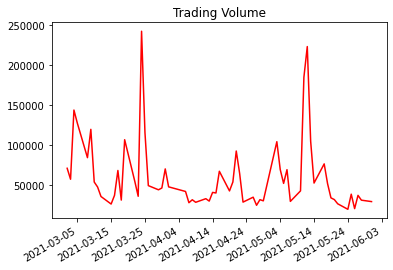

In [ ]:
# 折線圖 Line Chart
plt.plot( plot_df['日期'], plot_df['成交筆數'], linestyle='-', color='r' )

# 設定 x 座標軸的日期標籤
plt.gca().xaxis.set_major_formatter( mdates.DateFormatter('%Y-%m-%d') )
plt.gca().xaxis.set_major_locator( mdates.DayLocator(interval=10) )
plt.gcf().autofmt_xdate()

# 圖標題
plt.title( 'Trading Volume' )

plt.show()